In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, deque

def draw(G, **args):
    nx.draw(G, with_labels=True, font_size=8, **args)
    plt.show()

def component(G, N, i):
    C = []
    S = []
    S.append(i)
    N.remove(i)
    while S:
        node = S.pop()
        C.append(node)
        for j in G[node]:
            if j in N:
                N.remove(j)
                S.append(j)
    return C

def components(G):
    C = []
    N = set(G)
    while N:
        C.append(component(G, N, next(iter(N))))
    return C

def component_directed(G, N, i, correct):
    C = set()
    S = []
    S.append(i)
    N.remove(i)
    while S:
        node = S.pop()
        C.add(node)
        neighbours = None
        if correct:
            neighbours = G.successors(node)
        else:
            neighbours = G.predecessors(node)
        for j in neighbours:
            if j in N:
                N.remove(j)
                S.append(j)
    return C

def components_directed(G):
    C = []
    N = set(G)
    while N:
        current_node = next(iter(N))
        first = component_directed(G, N, current_node, correct=True)
        second = component_directed(G, first, current_node, correct=False)
        C.append(second)
        N.update(first)
    return C


In [ ]:

D2 = nx.scale_free_graph(30)
print("Finished building")
draw(D2)
scc_mine = sorted(components_directed(D2), key=len, reverse=True)
lengths = [len(c) for c in scc_mine]
print()
print(len(lengths))
print(lengths[0])

In [ ]:
D = nx.read_pajek('enron.net')
n = len(D)
m = D.number_of_edges()
print(n)
print(m)
lengths_mine = [len(c) for c in sorted(components_directed(D), key=len, reverse=True)]
lengths_nx = [len(c) for c in sorted(nx.strongly_connected_components(D), key=len, reverse=True)]
print(f"Mine: {len(lengths_mine)}, {lengths_mine[0]}")
print(f"Networkx: {len(lengths_nx)}, {lengths_nx[0]}")

In [ ]:
def calc_gamma(degrees, k_min):
    degrees = degrees[degrees >= k_min]
    n_dot = len(degrees)
    sum_value = np.sum(np.log(degrees / (k_min - 0.5)))
    gamma = 1 + n_dot * (1 / sum_value)
    return gamma

G = nx.read_pajek('lucene.net')
degrees = np.array(sorted([G.degree(n) for n in G.nodes()], reverse=True))
in_degrees = np.array(sorted([G.in_degree(n) for n in G.nodes()], reverse=True))
out_degrees = np.array(sorted([G.out_degree(n) for n in G.nodes()], reverse=True))
count_general = Counter(degrees)
count_in = Counter(in_degrees)
count_out = Counter(out_degrees)
fig = plt.figure()
plt.xscale("log")
plt.yscale("log")
general_dist = plt.scatter(count_general.keys(), count_general.values(), label="General degrees", s=20, alpha=0.8)
in_dist = plt.scatter(count_in.keys(), count_in.values(), label="In degrees", s=20, alpha=0.8)
out_dist = plt.scatter(count_out.keys(), count_out.values(), label="Out degrees", s=20, alpha=0.8)
plt.xlabel("k")
plt.ylabel("p(k)")
plt.legend()
plt.show()

cutoff = 5
gamma_general = calc_gamma(degrees, cutoff)
gamma_in = calc_gamma(in_degrees, cutoff)
gamma_out = calc_gamma(out_degrees, cutoff)
print(f"Gamma general: {gamma_general}")
print(f"Gamma in: {gamma_in}")
print(f"Gamma out: {gamma_out}")

               Graph | 'network_1'
               Nodes | 291,934
               Edges | 1,037,011
              Degree | 7.10
     Max node degree | 10721.00
            Distance | 6.32 (13)
             Density | 0.000024336
          Clustering | 0.253940671


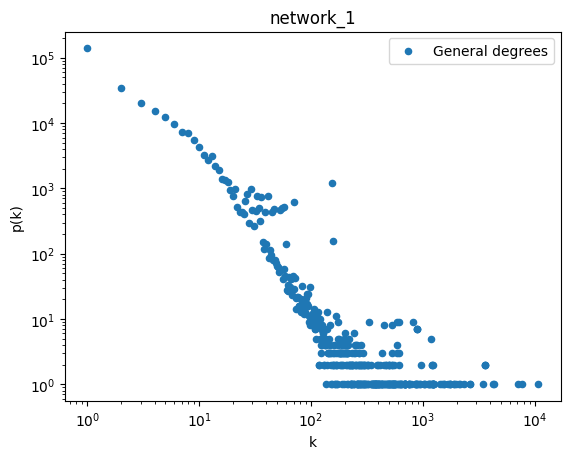


               Graph | 'network_2'
               Nodes | 189,207
               Edges | 703,484
              Degree | 7.44
     Max node degree | 22.00
            Distance | 6.30 (10)
             Density | 0.000039302
          Clustering | 0.000034372


<Figure size 640x480 with 0 Axes>

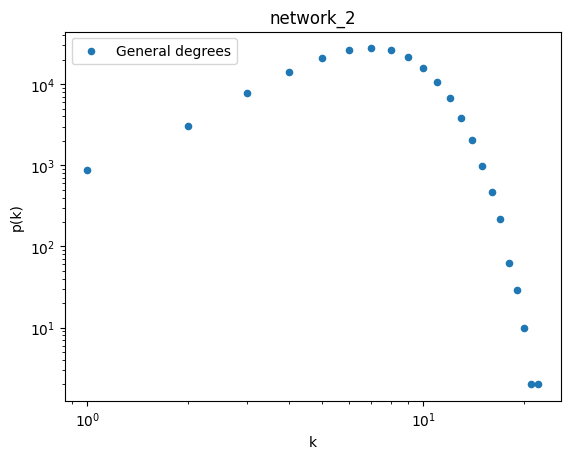


               Graph | 'network_3'
               Nodes | 94,093
               Edges | 766,258
              Degree | 16.29
     Max node degree | 5311.00
            Distance | 4.43 (12)
             Density | 0.000173099
          Clustering | 0.000000000


<Figure size 640x480 with 0 Axes>

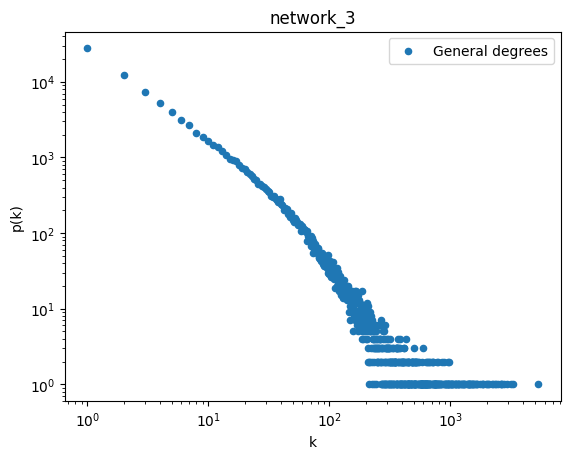


               Graph | 'network_4'
               Nodes | 202,275
               Edges | 509,097
              Degree | 5.03
     Max node degree | 2803.00
            Distance | 6.18 (20)
             Density | 0.000024886
          Clustering | 0.079784527


<Figure size 640x480 with 0 Axes>

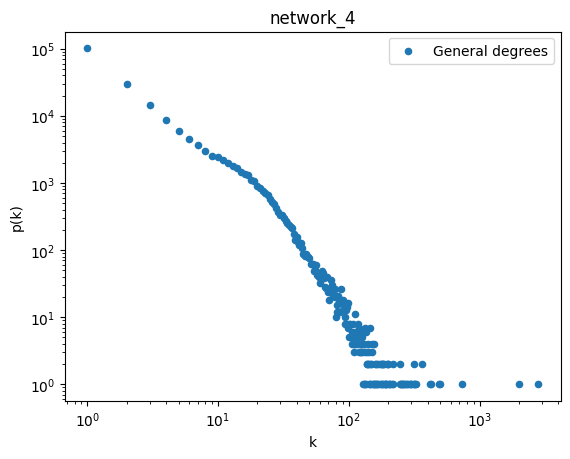


               Graph | 'network_5'
               Nodes | 83,159
               Edges | 5,510,251
              Degree | 132.52
     Max node degree | 3257.00
            Distance | 3.09 (5)
             Density | 0.001593632
          Clustering | 0.616332090


<Figure size 640x480 with 0 Axes>

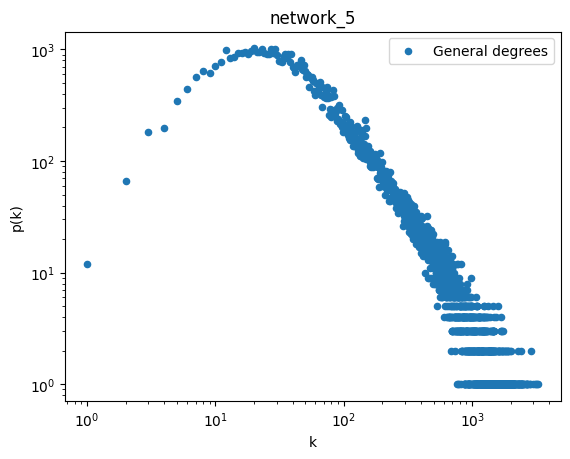

<Figure size 640x480 with 0 Axes>

In [160]:
def distance(G, i):
	D = [-1] * len(G) # D = {}
	Q = deque()
	D[i] = 0
	Q.append(i)
	while Q:
		i = Q.popleft()
		for j in G[i]:
			if D[j] == -1: # if j not in D:
				D[j] = D[i] + 1
				Q.append(j)
	return [d for d in D if d > 0]

def distances(G, n = 100):
	D = []
	approx = G.nodes()
	if len(G) > n:
		approx = random.sample(list(G.nodes()), n)
	for i in approx:
		D.append(distance(G, i))
	return D

def distribution(G):
	degrees = np.array(sorted([G.degree(n) for n in G.nodes()], reverse=True))
	count_general = Counter(degrees)
	fig = plt.figure()
	plt.xscale("log")
	plt.yscale("log")
	general_dist = plt.scatter(count_general.keys(), count_general.values(), label="General degrees", s=20)
	plt.xlabel("k")
	plt.ylabel("p(k)")
	plt.legend()
	plt.title(G.name)
	plt.show()
	plt.savefig(f"{G.name}")

def info(G):
	print("{:>20s} | '{:s}'".format('Graph', G.name))
	n = G.number_of_nodes()
	print("{:>20s} | {:,d}".format('Nodes', n))
	m = G.number_of_edges()
	print("{:>20s} | {:,d}".format('Edges', m))
	k = 2*m/n
	print("{:>20s} | {:.2f}".format('Degree', k))
	max_degree = max([G.degree(n) for n in G.nodes()])
	print("{:>20s} | {:.2f}".format('Max node degree', max_degree))
	dis = [i for d in distances(G) for i in d]
	print("{:>20s} | {:.2f} ({:,d})".format('Distance', sum(dis) / len(dis), max(dis)))
	density = k/(n-1)
	print("{:>20s} | {:.9f}".format('Density', density))
	clustering = nx.average_clustering(G)
	print("{:>20s} | {:.9f}".format('Clustering', clustering))
	distribution(G)

networks =  ['network_1', 'network_2','network_3','network_4','network_5']
for network in networks:
	file = f"{network}.adj"
	G = nx.convert_node_labels_to_integers(nx.read_edgelist(file))
	G.name = network
	info(G)
	print()